In [1]:
from classical_kickedrotor import KickedRotor1D
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns ; sns.set()

# Classical Kicked Rotor (CKR)

- A classical kicked rotor represents a classical particle constrained to move on a ring and subjected to periodic kicking forces. These kicks are modelled as delta-function potentials that are periodic (also called 'Dirac combs'). Between two successive kicks, the particle undergoes free-particle dynamics. 
- The classical kicked rotor is one of the simplest dynamical systems where one can observe chaos in 1-dimension by varying the kicking strength of the external field.  
- The dynamics is given by the standard map (aka "[Chirikov Map"](http://www.scholarpedia.org/article/Chirikov_standard_map)"):
$$p_{n+1} = p_n + K\sin{q_n}$$
$$q_{n+1} = q_n + p_{n+1}$$

# Step 1 : A single classical kicked rotor

In [2]:
# First, we create a classical kicked rotor object
ckr = KickedRotor1D(kicking_strength=0.5,initial_state=[1,2])

In [3]:
# We can then obtain its dynamics by iteratively constructing the phase-space using the chirikov map

pspace_ckr = ckr.get_phasespace(ntimesteps=100,keep_modulus=True)
print('Shape of phasespace elements under time evolution:',pspace_ckr.shape)

Shape of phasespace elements under time evolution: (2, 100)


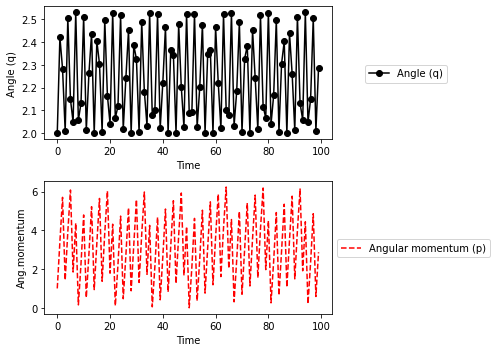

In [4]:
# Now we can plot how the angle and angular momentum respectively change with time

fig,axes = plt.subplots(nrows=2,ncols=1,figsize=(7,5))

p1, = axes[1].plot(pspace_ckr[0,:],'r--',label='Angular momentum (p)')
p2, = axes[0].plot(pspace_ckr[1,:],'ko-',label='Angle (q)')


axes[1].set(xlabel='Time',ylabel='Ang.momentum')
axes[0].set(xlabel='Time',ylabel='Angle (q)')
axes[0].legend(bbox_to_anchor=[1.1,0.6])
axes[1].legend(bbox_to_anchor=[1,0.6])
plt.tight_layout()

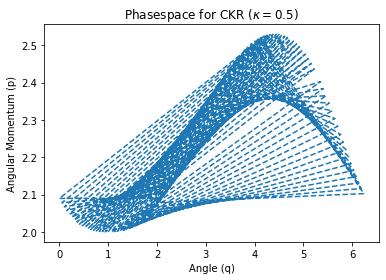

In [5]:
# We can plot the phasespace as follows:

plt.plot(pspace_ckr[0,:],pspace_ckr[1,:], '--')
plt.xlabel('Angle (q)')
plt.ylabel('Angular Momentum (p)')
plt.title('Phasespace for CKR ($\\kappa = 0.5$)')
plt.show()

# Many Rotors each with different kicking strengths



When the kicking strength is beyound a critical value $K_C$(~0.972), we observe a sensitive dependence on initial conditions $\Rightarrow$ Chaos!

In [6]:
kick = np.linspace(0,6,12) #create kick strength array

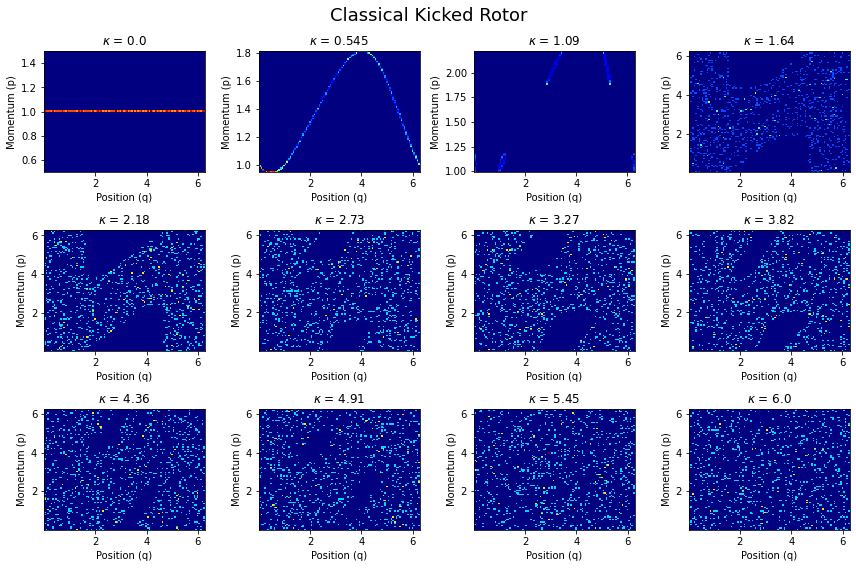

In [7]:
fig,axes = plt.subplots(figsize=(12,8),nrows=3,ncols=4)
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Classical Kicked Rotor',fontsize="18")


for index,ax in enumerate(axes.flatten()):
    rotor = KickedRotor1D(kick[index],[1,1])
    phspace = rotor.get_phasespace(1000)
    ax.hist2d(phspace[0,:],phspace[1,:], (100, 100), cmap=plt.cm.jet)
    ax.set_xlabel('Position (q)')
    ax.set_ylabel('Momentum (p)')
    ax.set_title(f'$\kappa$ = {kick[index]:.3}')

plt.tight_layout()

## Observe diffusive behaviour in Chaotic regime

In [8]:
rotor1 = KickedRotor1D(kicking_strength=1)
rotor2 = KickedRotor1D(kicking_strength=4)
rotor3 = KickedRotor1D(kicking_strength=6)

rotor1diff = rotor1.get_diffusion(ntimesteps=100,keep_modulus=False)
rotor2diff = rotor2.get_diffusion(ntimesteps=100,keep_modulus=False)
rotor3diff = rotor3.get_diffusion(ntimesteps=100,keep_modulus=False)

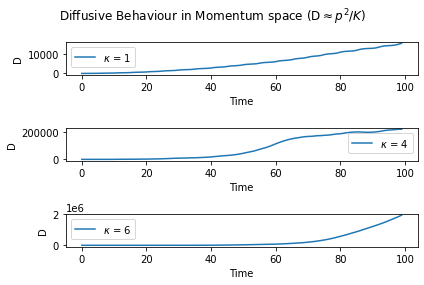

In [10]:
fig,axes=plt.subplots(3,1)
axes[0].plot(rotor1diff, label=f'$\\kappa$ = {rotor1.kicking_strength}')
axes[0].set(xlabel='Time', ylabel='D')
axes[0].legend()

axes[1].plot(rotor2diff, label=f'$\\kappa$ = {rotor2.kicking_strength}')
axes[1].set(xlabel='Time', ylabel='D')
axes[1].legend()

axes[2].plot(rotor3diff, label=f'$\\kappa$ = {rotor3.kicking_strength}')
axes[2].set(xlabel='Time', ylabel='D')
axes[2].legend()

plt.suptitle("Diffusive Behaviour in Momentum space (D$\\approx p^2/K$)")
plt.tight_layout()
plt.legend()
plt.show()